# QQ plot

By Alberto Valdés 

**Mail 1:** anvaldes@uc.cl 

**Mail 2:** alberto.valdes.gonzalez.96@gmail.com

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import time
import math
import scipy
import pylab as py
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import norm
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib import image as mpimg
from statsmodels.distributions.empirical_distribution import ECDF

In [3]:
def display_img(name, a, b):
    plt.figure(figsize = (a, b))
    image = mpimg.imread(name)
    plt.imshow(image)
    plt.axis('off')
    plt.show()

The QQ-plot (Quantile-Quantile) is used to test if the data follows the standard normal distribution ($ \mu = 0, \sigma = 1 $). 

**For this reason to test if the data follows a normal distribution we have to standarize the data and then test if the data follows a standard normal distribution.**

### Explanation

i. We take our data. 

ii. We take some values of our data equispaced in terms of probability (that is to say, quantiles).

iii. For each value and its probability we search what quantile corresponds to each probability if the distribution was standar normal. 

iv. So we have two quantiles, and we plot the both (x-axis: data quantiles, y-axis: theorical quantiles).

v. If the distribution is normal the plot must to be a straight line.

### Important Note

We can do the same with **other distributions** and not only with the standard normal.

### Example

Find the relation on a $ QQ-plot$ between a exponential distribution and standard normal distribution.

If we have Exp($\lambda$), then $ F(x) = 1 - e^{-\lambda \cdot x} $.

We have two relations:

$ $

**Exponential**

$ p = 1 - e^{-\lambda \cdot y} \Rightarrow \boxed{y = - \frac{ln(1-p)}{\lambda}} $

**Normal**

$ \boxed{p = \Phi(x)} $ 

$ \ $ 

Combining the both we have:

$ \boxed{y =  - \frac{ln(1-\Phi(x))}{\lambda}} $

Using $ \lambda = 1 $ we have the next plot:

In [4]:
X = [(i/100) for i in range(-400, 400)]
y = [-math.log(1 - norm.cdf(x)) for x in X]

[]

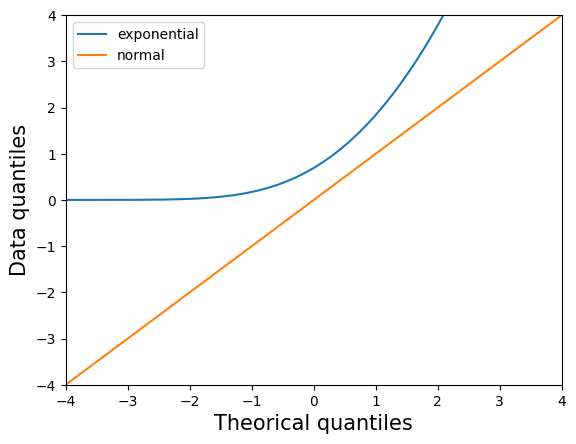

In [5]:
plt.plot(X, y, label = 'exponential')
plt.plot(X, X, label = 'normal')
plt.ylabel('Data quantiles', fontsize = 15)
plt.xlabel('Theorical quantiles', fontsize = 15)
plt.legend()
plt.xlim(-4, 4)
plt.ylim(-4, 4)
plt.plot()

In [6]:
start = time.time()

# 1. Apply to samples

### i. Normal vs Standard Normal

**a. Without standarize**

In [7]:
data_points = np.random.normal(10, 20, 1_000)

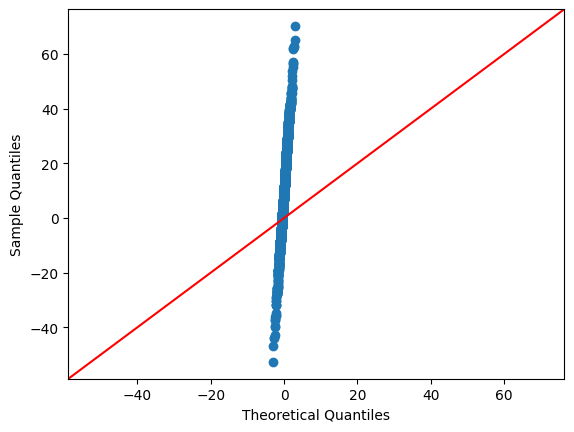

In [8]:
sm.qqplot(data_points, line = '45') 
py.show()

**b. With standarize**

In [9]:
data_points_std = (data_points - np.mean(data_points))/np.std(data_points)

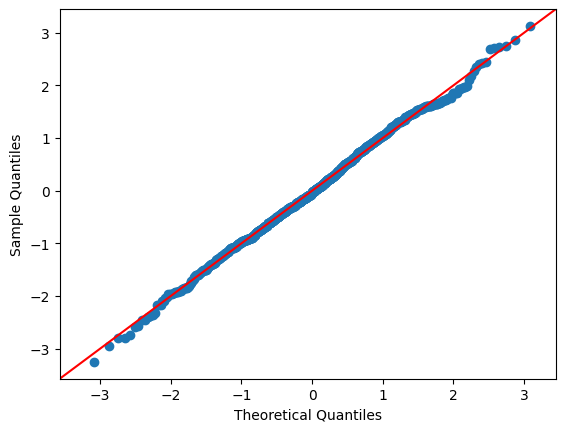

In [10]:
sm.qqplot(data_points_std, line = '45') 
py.show()

### ii. Exponential vs Standard Normal

In [11]:
data_points = np.random.exponential(1, 1_000)

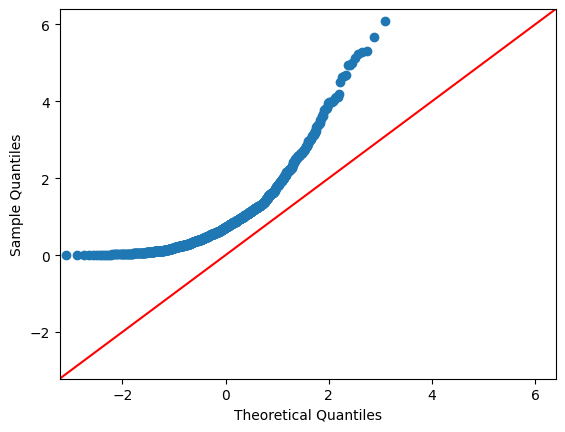

In [12]:
sm.qqplot(data_points, line = '45') 
py.show()

### iii. Standard Normal vs Standard Normal

In [13]:
data_points = np.random.normal(0, 1, 1_000)

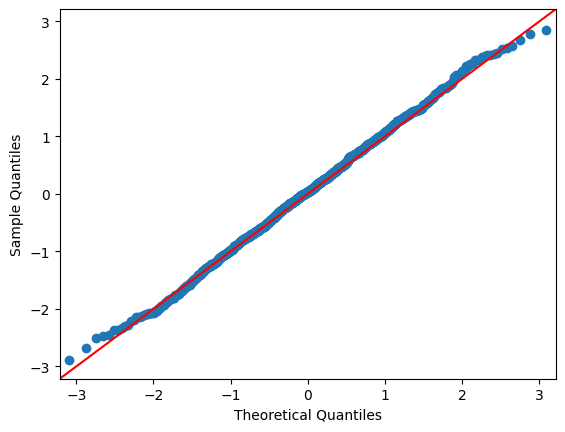

In [14]:
sm.qqplot(data_points, line = '45') 
py.show()

### Time of execution

In [15]:
end = time.time()

In [16]:
delta = (end - start)

hours = int(delta/3600)
mins = int((delta - hours*3600)/60)
segs = int(delta - hours*3600 - mins*60)
print(f'Execute this notebook take us {hours} hours, {mins} minutes and {segs} seconds.')

Execute this notebook take us 0 hours, 0 minutes and 0 seconds.
